# Figure 4

In this notebook we produce figure 4 from [Donald-McCann, Koyama, Beutler (2022)](https://arxiv.org/abs/2202.07557). We will be producing this plot with `GetDist` [Lewis (2019)](https://arxiv.org/abs/1910.13970).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import getdist
from getdist import plots, MCSamples

As with most of the other notebooks in this repo we start by specifying the repo location.

In [2]:
path_to_repo = "/Users/jamie/Desktop/GitHubProjects/matryoshka_II_paper/"

We start by loading the chains from the MCMCs at each redshift.

In [3]:
LOWZ = np.load(path_to_repo+"results/chain--EFTEMU_z-0.38_V-5000_kmin-def_kmax-def_1.npy")
CMASS1 = np.load(path_to_repo+"results/chain--EFTEMU_z-0.51_V-5000_kmin-def_kmax-def_1.npy")
CMASS2 = np.load(path_to_repo+"results/chain--EFTEMU_z-0.61_V-5000_kmin-def_kmax-def_3.npy")

We then define labels, names, and the ranges of any uniform priors.

In [4]:
labels = [r"\omega_c",r"h",r"A_s", r"b_1", r"c_2", r"b_3", r"c_{ct}", r"c_{r,1}",
          r"c_{\epsilon,1}", r"c_{\epsilon,quad}"]
names = ["omega_c","h","As", "b1", "c2", "b3", "cct", "cr1", "ce1", "cq"]
bounds_dict = {"omega_c": [0.109988, 0.129229], 
               "h": [0.57451438, 0.74766042], 
               "As": [2.77885117, 3.32142323], 
               "b1": [0., 4.], 
               "c2": [-4., 4.]}

We now pass the chains and the lebels etc. to `GetDist`.

In [5]:
LOWZ_samples = MCSamples(samples=LOWZ, names = names, labels = labels, label = r"z=0.38", ranges=bounds_dict)
LOWZ_samples.updateSettings({'smooth_scale_2D': 0.4, 'smooth_scale_1D':0.2})
CMASS1_samples = MCSamples(samples=CMASS1, names = names, labels = labels, label = r"z=0.51", ranges=bounds_dict)
CMASS1_samples.updateSettings({'smooth_scale_2D': 0.4, 'smooth_scale_1D':0.2})
CMASS2_samples = MCSamples(samples=CMASS2, names = names, labels = labels, label = r"z=0.61", ranges=bounds_dict)
CMASS2_samples.updateSettings({'smooth_scale_2D': 0.4, 'smooth_scale_1D':0.2})

Removed no burn in
Removed no burn in
Removed no burn in


We define the truths,

In [6]:
cosmo_true = np.array([0.11933, 0.02242, 0.6766, 3.047, 0.9665])
truths = cosmo_true[[0,2,3]]

and produce the corner plot.

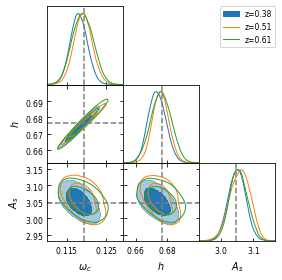

In [7]:
g = plots.get_subplot_plotter(width_inch=4)

g.settings.axes_fontsize = 12

g.triangle_plot([LOWZ_samples, CMASS1_samples, CMASS2_samples], ["omega_c", "h", "As"], filled=[True, False, False],
                contour_colors=['tab:blue', 'tab:orange', 'tab:green'], contour_lws=[1., 1., 1.])

# Note: This loop of axes is not really needed.
# GetDist has functionality for adding truths.
for i in range(truths.shape[0]):
    for j in range(truths.shape[0]):
        if i == j:
            g.subplots[i,j].axvline(truths[i], color='gray', ls='--')
        elif j < i:
            g.subplots[i,j].axvline(truths[j], color='gray', ls='--')
            g.subplots[i,j].axhline(truths[i], color='gray', ls='--')
            
g.export(path_to_repo+'plots/corner_redshift--cosmo.pdf')